# **Titanic Disaster Project**

**One of the best ways to find the best classifier and to optimize our classifier by iterating through different parameters to find the best.**

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taitanic/train.csv
/kaggle/input/taitanic/test.csv
/kaggle/input/dataset10/train.csv
/kaggle/input/dataset10/test.csv


In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
df_data=pd.read_csv("/kaggle/input/dataset10/train.csv")
df_test=pd.read_csv('/kaggle/input/dataset10/test.csv')

In [48]:
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




# Age, Cabin and Embarked has NaN values

# Using Salutaiton prefix to make out the age of the passanger to later age range wise encode it

In [50]:
df_data['Initial']=0
for i in df_data:
    df_data['Initial']=df_data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [51]:
df_test['Initial']=0
for i in df_test:
    df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

In [52]:
pd.crosstab(df_data.Initial,df_data.Sex).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


# Fixing some typos and misspless in the dataset for salutation

In [53]:
df_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [54]:
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [55]:
df_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [56]:
# Assigning the NaN Values with the Ceil values of the mean ages
df_data.loc[(df_data.Age.isnull())&(df_data.Initial=='Master'),'Age']=5
df_data.loc[(df_data.Age.isnull())&(df_data.Initial=='Miss'),'Age']=22
df_data.loc[(df_data.Age.isnull())&(df_data.Initial=='Mr'),'Age']=33
df_data.loc[(df_data.Age.isnull())&(df_data.Initial=='Mrs'),'Age']=36
df_data.loc[(df_data.Age.isnull())&(df_data.Initial=='Other'),'Age']=46

In [57]:
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age']=5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age']=33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age']=36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age']=46


# Replacing embarked NaN values with S since there are only 3 NaN values

In [58]:
df_data['Embarked'].fillna('S',inplace=True)

In [59]:
df_test['Embarked'].fillna('S',inplace=True)

In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [61]:
df_data['Age_Group'] = 0  # Initialize a new column for Age groups

df_data.loc[df_data['Age'] <= 16, 'Age_Group'] = 0
df_data.loc[(df_data['Age'] > 16) & (df_data['Age'] <= 32), 'Age_Group'] = 1
df_data.loc[(df_data['Age'] > 32) & (df_data['Age'] <= 48), 'Age_Group'] = 2
df_data.loc[(df_data['Age'] > 48) & (df_data['Age'] <= 64), 'Age_Group'] = 3
df_data.loc[df_data['Age'] > 64, 'Age_Group'] = 4

df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [62]:
df_test['Age_Group'] = 0  # Initialize a new column for Age groups

df_test.loc[df_test['Age'] <= 16, 'Age_Group'] = 0
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 32), 'Age_Group'] = 1
df_test.loc[(df_test['Age'] > 32) & (df_test['Age'] <= 48), 'Age_Group'] = 2
df_test.loc[(df_test['Age'] > 48) & (df_test['Age'] <= 64), 'Age_Group'] = 3
df_test.loc[df_test['Age'] > 64, 'Age_Group'] = 4


[Text(0.5, 1.0, 'Count Plot for Age')]

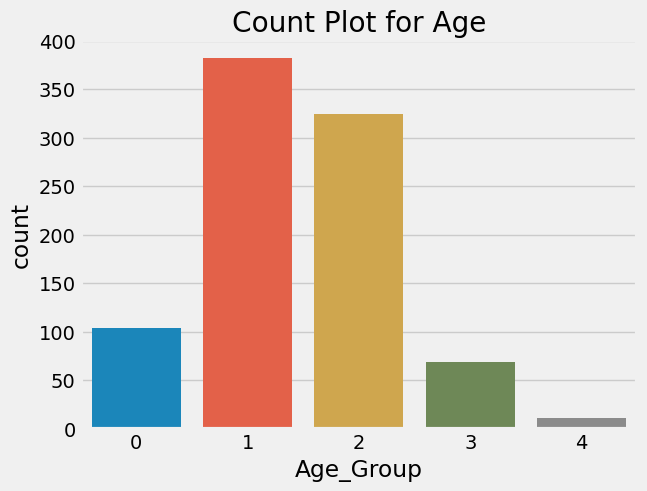

In [63]:
sns.countplot(x='Age_Group', data=df_data).set(title='Count Plot for Age')

# Encoding Fare categories range wise

In [64]:
df_data['Fare_cats']=0
df_data.loc[df_data['Fare']<=7.91,'Fare_cats']=0
df_data.loc[(df_data['Fare']>7.91)&(df_data['Fare']<=14.454),'Fare_cats']=1
df_data.loc[(df_data['Fare']>14.454)&(df_data['Fare']<=31),'Fare_cats']=2
df_data.loc[(df_data['Fare']>31)&(df_data['Fare']<=513),'Fare_cats']=3


In [65]:
df_test['Fare_cats']=0
df_test.loc[df_test['Fare']<=7.91,'Fare_cats']=0
df_test.loc[(df_test['Fare']>7.91)&(df_test['Fare']<=14.454),'Fare_cats']=1
df_test.loc[(df_test['Fare']>14.454)&(df_test['Fare']<=31),'Fare_cats']=2
df_test.loc[(df_test['Fare']>31)&(df_test['Fare']<=513),'Fare_cats']=3

# Plot the count plot of fare categories vs survived

[Text(0.5, 1.0, 'Count Plot of Fare Categories vs Survived')]

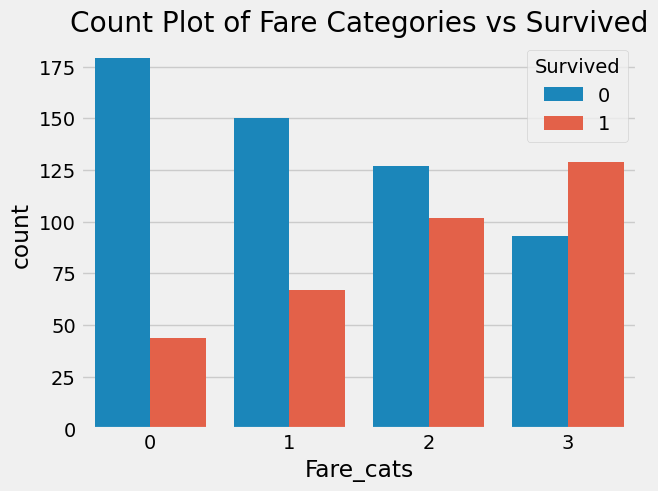

In [66]:
sns.countplot(x='Fare_cats', hue='Survived', data=df_data).set(title='Count Plot of Fare Categories vs Survived')


In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_data['Sex'] = label_encoder.fit_transform(df_data['Sex'])
df_data['Embarked'] = label_encoder.fit_transform(df_data['Embarked'])
df_data['Initial'] = label_encoder.fit_transform(df_data['Initial'])

df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_Group,Fare_cats
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,2,1


In [68]:
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])
df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])
df_test['Initial'] = label_encoder.fit_transform(df_test['Initial'])

In [69]:
df_data.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)

In [70]:
df_test.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)

In [71]:
df_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_Group,Fare_cats
0,0,3,1,1,0,2,2,1,0
1,1,1,0,1,0,0,3,2,3
2,1,3,0,0,0,2,1,1,1
3,1,1,0,1,0,2,3,2,3
4,0,3,1,0,0,2,2,2,1


In [72]:
df_test.head

<bound method NDFrame.head of      Pclass  Sex  SibSp  Parch  Embarked  Initial  Age_Group  Fare_cats
0         3    1      0      0         1        3          2          0
1         3    0      1      0         2        4          2          0
2         2    1      0      0         1        3          3          1
3         3    1      0      0         2        3          1          1
4         3    0      1      1         2        4          1          1
..      ...  ...    ...    ...       ...      ...        ...        ...
413       3    1      0      0         2        3          2          1
414       1    0      0      0         0        0          2          3
415       3    1      0      0         2        3          2          0
416       3    1      0      0         2        3          2          1
417       3    1      1      1         0        1          0          2

[418 rows x 8 columns]>

In [73]:
test_dataset = df_test
test_dataset


,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_Group,Fare_cats
0,3,1,0,0,1,3,2,0
1,3,0,1,0,2,4,2,0
2,2,1,0,0,1,3,3,1
3,3,1,0,0,2,3,1,1
4,3,0,1,1,2,4,1,1
...,...,...,...,...,...,...,...,...
413,3,1,0,0,2,3,2,1
414,1,0,0,0,0,0,2,3
415,3,1,0,0,2,3,2,0
416,3,1,0,0,2,3,2,1


In [74]:
train_Y = df_data['Survived'].ravel()
train_X = df_data.drop('Survived', axis=1)

test_X = test_dataset


# Import the algorithms, train it and test it find the accuracy of it

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import  VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

pipeline = Pipeline(steps=[
    ('classifier', VotingClassifier(estimators=[
        ('logreg', LogisticRegression(max_iter=1000)),
        ('gnb', GaussianNB()),
        ('xgb', XGBClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft'))
])


In [76]:
param_grid = {
    # Logistic Regression
    'classifier__logreg__C': [0.1, 1.0, 10],
    # Gaussian Naive Bayes
    'classifier__gnb__var_smoothing': [1e-9, 1e-8],
    # XGBoost
    'classifier__xgb__learning_rate': [0.01, 0.1],
    'classifier__xgb__n_estimators': [100, 200],
    'classifier__xgb__max_depth': [3, 5],
    # SVC
    'classifier__svc__C': [0.1, 1, 10],
    'classifier__svc__kernel': ['rbf', 'linear']
}


In [77]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(train_X, train_Y)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        VotingClassifier(estimators=[('logreg',
                                                                      LogisticRegression(max_iter=1000)),
                                                                     ('gnb',
                                                                      GaussianNB()),
                                                                     ('xgb',
                                                                      XGBClassifier(base_score=None,
                                                                                    booster=None,
                                                                                    callbacks=None,
                                                                                    colsample_bylevel=None,
                                                                                    colsample_bynode=None,
                                                                                    colsample_bytree=None,
                                                                                    device=None,
                                                                                    early_stopping_rounds=None,
                                                                                    enable_categorical=False,
                                                                                    e...
                                                                      SVC(probability=True))],
                                                         voting='soft'))]),
             n_jobs=-1,
             param_grid={'classifier__gnb__var_smoothing': [1e-09, 1e-08],
                         'classifier__logreg__C': [0.1, 1.0, 10],
                         'classifier__svc__C': [0.1, 1, 10],
                         'classifier__svc__kernel': ['rbf', 'linear'],
                         'classifier__xgb__learning_rate': [0.01, 0.1],
                         'classifier__xgb__max_depth': [3, 5],
                         'classifier__xgb__n_estimators': [100, 200]},
             verbose=1)

In [78]:
print("Best Parameters:", grid_search.best_params_)
best_estimator = grid_search.best_estimator_

Best Parameters: {'classifier__gnb__var_smoothing': 1e-09, 'classifier__logreg__C': 0.1, 'classifier__svc__C': 1, 'classifier__svc__kernel': 'rbf', 'classifier__xgb__learning_rate': 0.01, 'classifier__xgb__max_depth': 3, 'classifier__xgb__n_estimators': 100}


In [79]:
y_pred = best_estimator.predict(test_X)

In [80]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_estimator, train_X, train_Y, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy scores: {cv_scores}')
print(f'Mean cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy scores: [0.83240223 0.8258427  0.81460674 0.78651685 0.85955056]
Mean cross-validated accuracy: 0.8237838177138912


In [85]:
append =pd.read_csv('/kaggle/input/dataset10/test.csv')

In [86]:
submission = pd.DataFrame({
    'PassengerId': append['PassengerId'],
    'Survived': y_pred
})

submission.to_csv('submission.csv', index=False)


# Submission of the output value

In [87]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
